<a href="https://colab.research.google.com/github/saiteja2105/github-slideshow/blob/master/Program1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


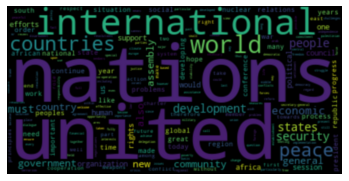

In [8]:
import pandas as pd
import regex as re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

stopwords = set (nltk.corpus.stopwords.words('english'))

df = pd.read_csv("/content/un-general-debates-blueprint.csv")

def tokenize(text):
	return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
	return [t for t in tokens if t not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
	tokens = text
	for transform in pipeline:
		tokens = transform(tokens)
	return tokens

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

counter = Counter()
df['tokens'].map(counter.update)

wc = WordCloud()
wc.generate_from_frequencies(counter)
plt.imshow(wc, interpolation='bicubic')
plt.axis("off")
plt.show()

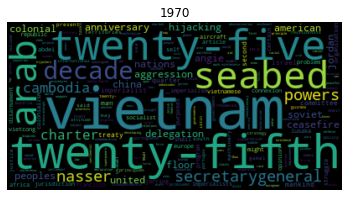

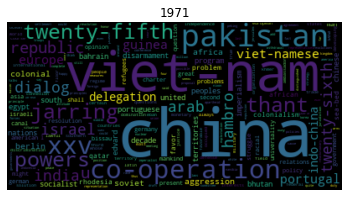

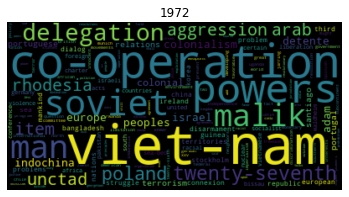

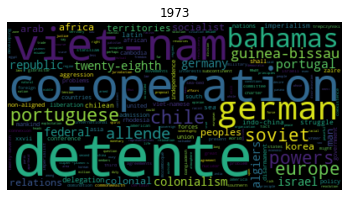

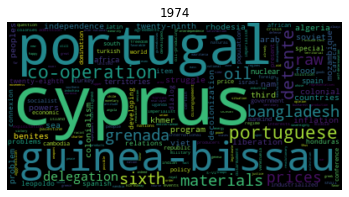

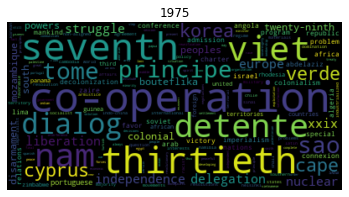

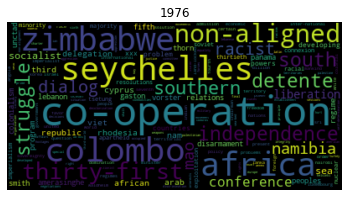

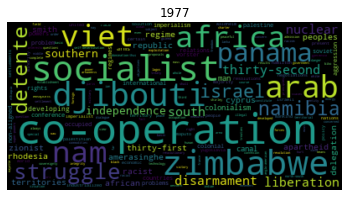

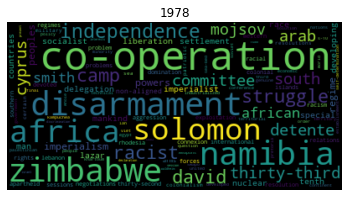

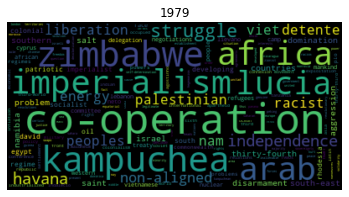

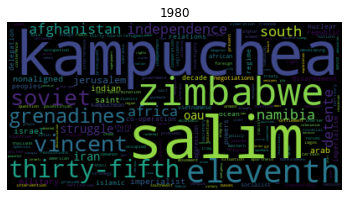

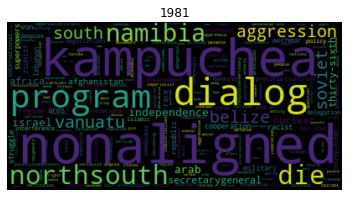

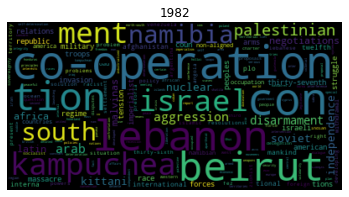

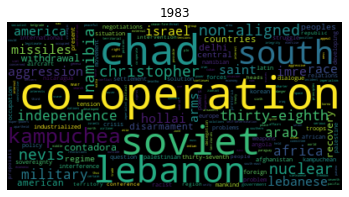

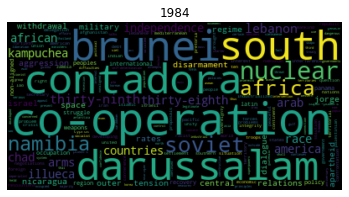

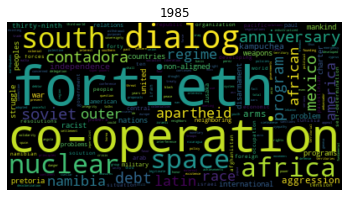

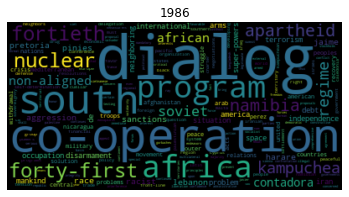

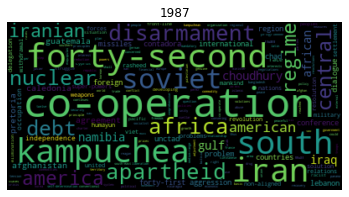

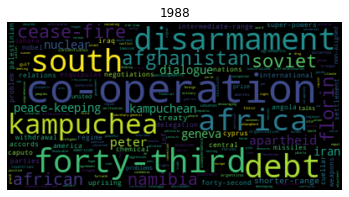

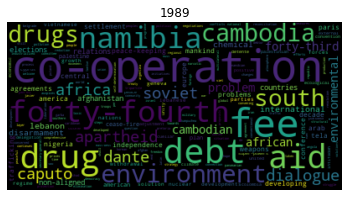

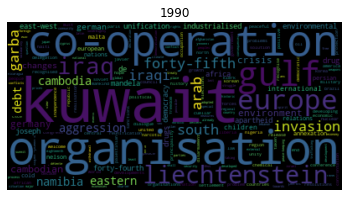

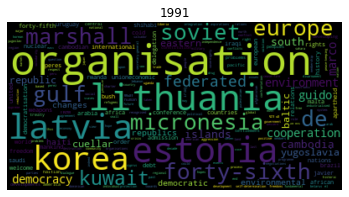

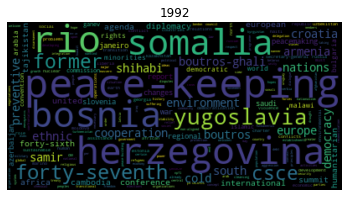

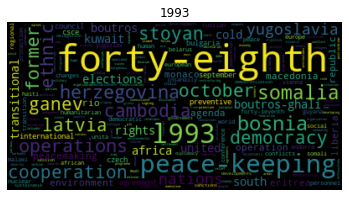

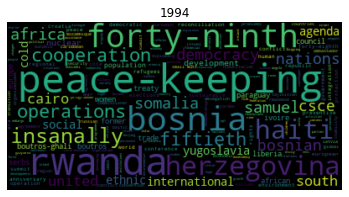

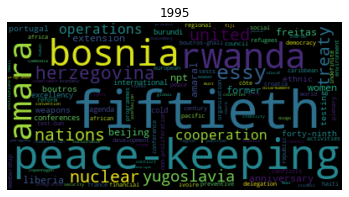

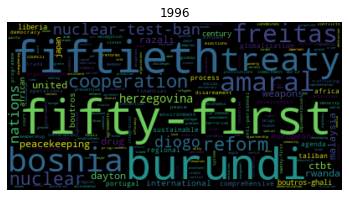

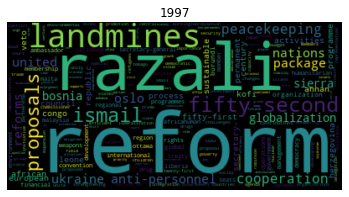

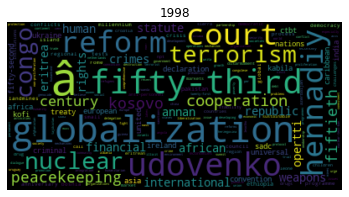

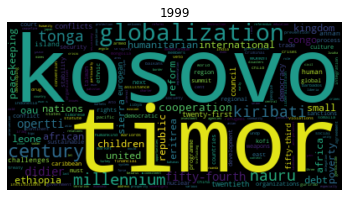

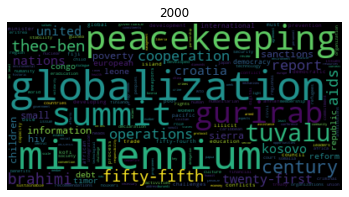

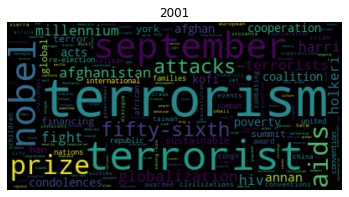

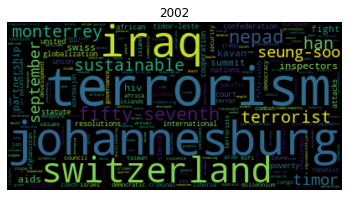

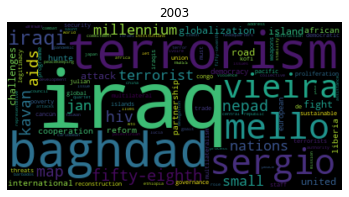

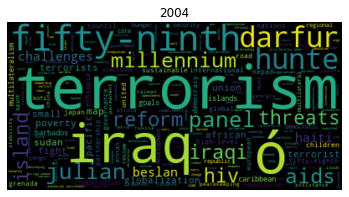

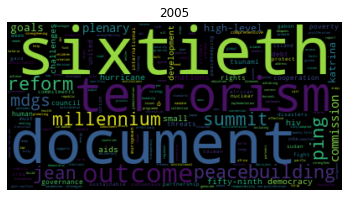

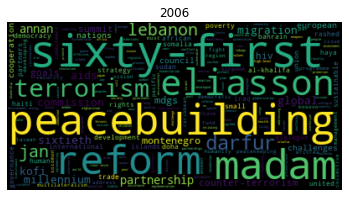

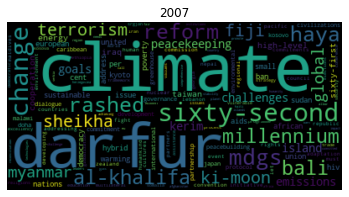

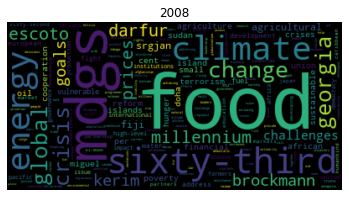

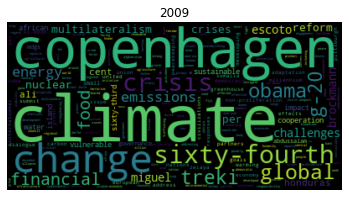

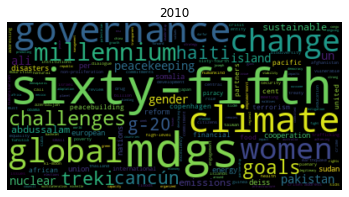

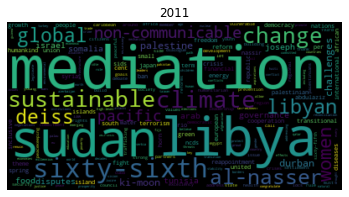

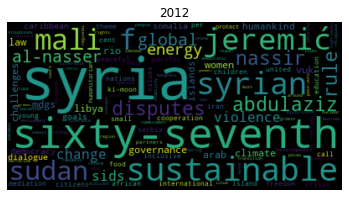

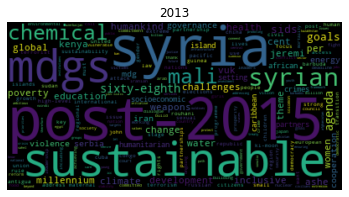

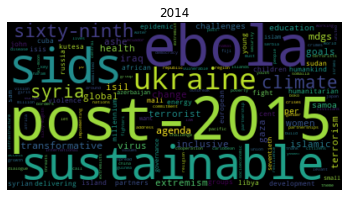

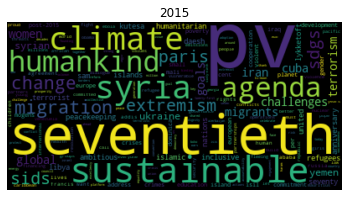

In [9]:
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

stopwords = set(nltk.corpus.stopwords.words('english'))

df = pd.read_csv("/content/un-general-debates-blueprint.csv")

def tokenize(text):
	return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
	return [t for t in tokens if t not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
	tokens = text
	for transform in pipeline:
		tokens = transform(tokens)
	return tokens

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

counter = Counter()
df['tokens'].map(lambda x: counter.update(set(x)))
N = len(df)

idf = dict(map(lambda x: (x[0], np.log(N/x[1]) + 0.1), counter.items()))

for y in range(1970, 2016):
	counter.clear()
	df[df['year'] == y]['tokens'].map(counter.update)
	tfidf = dict(map(lambda x: (x[0], x[1] * idf.get(x[0])), counter.items()))

	wc = WordCloud()
	wc.generate_from_frequencies(tfidf)
	plt.imshow(wc, interpolation='bilinear')
	plt.title(str(y))
	plt.axis("off")
	plt.show()